# Business Problem
Dream housing finance company deals in all kinds of home loans they have presence across all urban semi urban and rural areas custom of first applies for home loan and after that company validates the customer eligibility for loan.
company wants to automate the loan eligibility process real time based on customer detail provided while feeling online application form this details education ,number of dependents, income, loan amount, credit history, and others to automatically process they have provided data set to identify the customer segments that available for loan amount so that can specifically target this customers

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [232]:
df= pd.read_csv('Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


from above info we observed that 'dependents' and 'loan_amount_term' column is labelled as object as it is count_variable ------------> hence we need to change

In [234]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [235]:
df['Loan_ID']#.nunique()#.shape

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

There are unique loan id's hence theres no need of this variable

In [236]:
#Drop this column
df.drop(columns = ['Loan_ID'] , inplace = True)

In [237]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [238]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [239]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [240]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [241]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [242]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [243]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [244]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [245]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [246]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [247]:
# As per business problem we merge columnsof applicants income along with co-applicants income 
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [248]:
# as it was created as a seperate column we delected the combined two columns
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'] , inplace = True)

In [249]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [250]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [251]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [252]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [253]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [254]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [255]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [256]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [257]:
continuous=['Income' , 'LoanAmount']
discrete_categorical  = ['Gender', 'Married', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
discrete_count = ['Dependents' , 'Loan_Amount_Term']

# EDA

For continuous data we do describe ,  histplot , corr using heatmap , pairplot

In [258]:
df[continuous].describe()

,Income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


<Axes: xlabel='LoanAmount', ylabel='Count'>

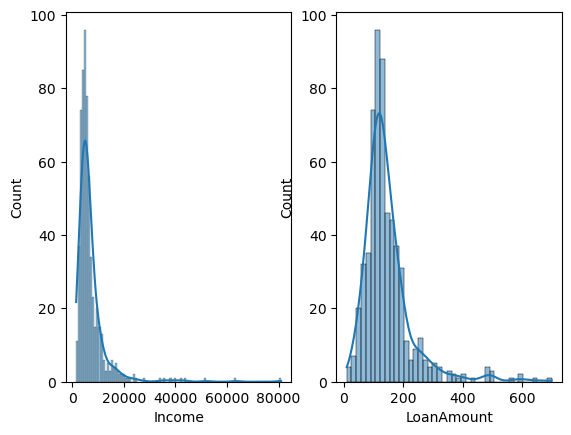

In [259]:
plt.subplot(1,2,1)
sns.histplot(df['Income'] , kde = True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'], kde = True)

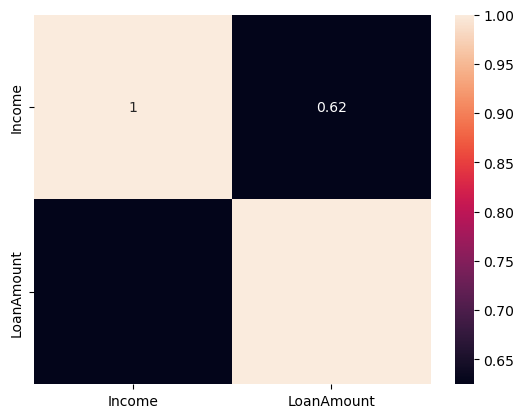

In [260]:
sns.heatmap(df[continuous].corr() , annot = True)
plt.show()

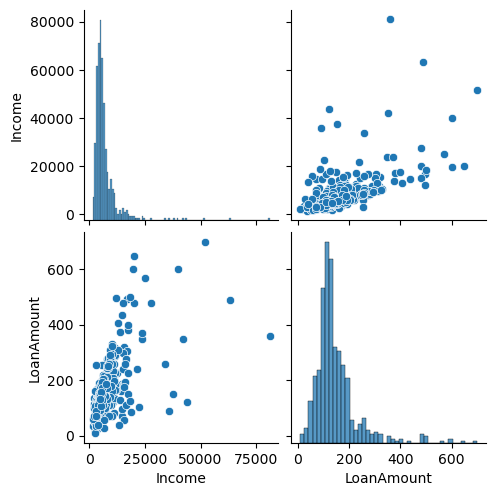

In [261]:
sns.pairplot(df[continuous])
plt.show()

For Discrete_variables

In [262]:
df[discrete_categorical].describe()

,Credit_History
count,564.000000
mean,0.842199
std,0.364878
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [263]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

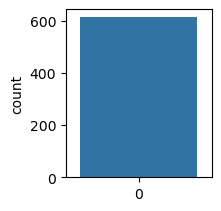

In [264]:
df['Gender'] = df['Gender'].replace({'Male': 1 , 'Female' : 0})
plt.subplot(2,3,1)
sns.countplot(df['Gender']) # first change into count values
plt.show()

#sns.countplot(df['Married'])

In [265]:
df['Gender'].value_counts()
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [266]:
# Lets compare all categories
print("impact of marriage on loan status")
print(pd.crosstab(df['Loan_Status'], df['Married']))
print('\n')

print('impact of dependents on loan status')
print(pd.crosstab(df['Loan_Status'], df['Dependents']))
print('\n')

print('impact of education on loan status')
print(pd.crosstab(df['Loan_Status'] , ['Education']))
print('\n')

print('impact of self employed on loan status')
print(pd.crosstab(df['Loan_Status'] , ['Self_Employed']))
print('\n')

print('impacto of LoanAmount on loan status')
print(pd.crosstab(df['Loan_Status'] , ['LoanAmount']))
print('\n')

print('impacto of Loan_Amount_Term on loan status')
print(pd.crosstab(df['Loan_Status'] , ['Loan_Amount_Term']))
print('\n')

print('impacto of Credit_History on loan status')
print(pd.crosstab(df['Loan_Status'] , ['Credit_History']))
print('\n')

print('impacto of Property_Area on loan status')
print(pd.crosstab(df['Loan_Status'] , ['Property_Area']))
print('\n')

print('impacto of Income on loan status')
print(pd.crosstab(df['Loan_Status'] , ['Income']))
print('\n')

impact of marriage on loan status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


impact of dependents on loan status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


impact of education on loan status
col_0        Education
Loan_Status           
N                  192
Y                  422


impact of self employed on loan status
col_0        Self_Employed
Loan_Status               
N                      192
Y                      422


impacto of LoanAmount on loan status
col_0        LoanAmount
Loan_Status            
N                   192
Y                   422


impacto of Loan_Amount_Term on loan status
col_0        Loan_Amount_Term
Loan_Status                  
N                         192
Y                         422


impacto of Credit_History on loan status
col_0        Credit_History
Loan_Status                
N                       192
Y                  

In [267]:
# ckeck skewness
df[continuous].skew()


#here skewness is very high hence we reduce skewwness using boxcox

Income        5.633449
LoanAmount    2.677552
dtype: float64

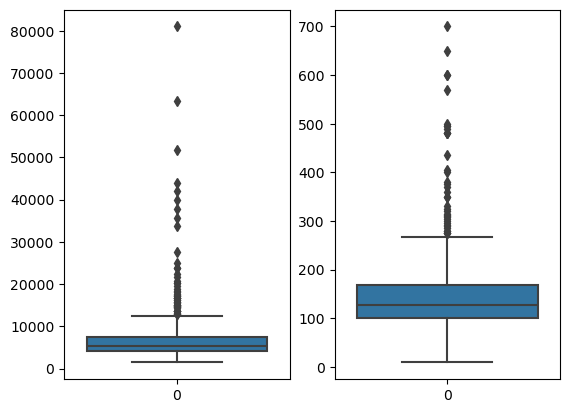

In [268]:
# check outliers
plt.subplot(1,2,1)
sns.boxplot(df['Income'])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])
#plt.title('Outliers')
plt.show()

# Data Preprocessing

Wrong data
missimg values
wrong data type
duplicates
outliers

2. Data wangling
   transformation
   scaling
   encoding
   

In [269]:
df.isnull().sum()

Gender               0
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [270]:
# wrong data treatment
df['Dependents'] = df['Dependents'].replace('3+'  ,3)
df['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [271]:
df[df['Gender'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income


In [272]:
# filling missing values

In [273]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(0).astype(int)
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [274]:
#converting wrong data type
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'].astype('int')

0      360
1      360
2      360
3      360
4      360
      ... 
609    360
610    180
611    360
612    360
613    360
Name: Loan_Amount_Term, Length: 614, dtype: int32

In [275]:
df.duplicated().sum()

0

In [276]:
#X = df.drop('Loan_Status' ,axis = 1)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [277]:
# Encoding
#pd.get_dummies(X, drop_first = True).astype(int)
df['Married'] = df['Married'].replace({"Yes":1 , 'No' : 0})
df['Education']  = df['Education'].replace({'Graduate' : 0 , 'Not Graduate' : 1})
df['Self_Employed']= df['Self_Employed'].replace({'No':0, 'Yes':1})
df['Property_Area'] = df['Property_Area'].replace({'Urban' : 2, 'Rural' : 0, 'Semiurban' : 1})
df['Loan_Status'] = df['Loan_Status'].replace({'Y' : 1 , 'N' : 0})

In [278]:
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [279]:
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

In [280]:
# Transformation (boz we have noticed some skew )
from scipy.stats import boxcox
df['Income'],a = boxcox(df['Income'])
df['LoanAmount'] , c = boxcox(df['LoanAmount'])

In [281]:
df[continuous].skew() #al gets normalized

Income       -0.034662
LoanAmount    0.030458
dtype: float64

In [282]:
X = df.drop('Loan_Status' , axis = 1)
y =df['Loan_Status']

In [283]:
from sklearn.model_selection import train_test_split
X_train  ,X_test , y_train , y_test = train_test_split(X , y ,train_size = 0.8 , random_state = 43)

In [284]:
scaling  = ['LoanAmount' ,'Loan_Amount_Term' , 'Income' ]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scaling] = sc.fit_transform(X_train[scaling])
X_test_scaled[scaling] = sc.transform(X_test[scaling])

In [285]:
 # Modelling and evalutation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [286]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,1,0,0,0,0,6.034999,30.0,1.0,2,1,1.975060
1,1,1,1,0,0,5.841340,30.0,1.0,0,0,1.975586
2,1,1,0,0,1,4.914615,30.0,1.0,2,1,1.964668
3,1,1,0,1,0,5.749027,30.0,1.0,2,1,1.972752
4,1,0,0,0,0,5.980529,30.0,1.0,2,1,1.975392
5,1,1,2,0,1,6.924795,30.0,1.0,2,1,1.980829
6,1,1,0,1,0,5.418550,30.0,1.0,2,1,1.968957
7,1,1,3,0,0,6.145618,30.0,0.0,1,0,1.974338
8,1,1,2,0,0,6.235199,30.0,1.0,2,1,1.974319
9,1,1,1,0,0,7.334405,30.0,1.0,1,0,1.988289


#------Creating a DataFrame that stores all the metrics and performance of each model which will help in Model Selection----------------
algorithms = ['logistic_Model', 'knn_Model', 'svm_Model', 'dt_Model', 'rf_Model', 'ada_Model', 'gb_Model', 'xg_Model']
metrics = ['TrainAccuracy', 'TestAccuracy', 'TrainPrecision', 'TestPrecision','TrainRecall', 'TestRecall',
          'TrainF1', 'TestF1', 'CV']

analysis_df = pd.DataFrame(index=algorithms, columns=metrics)

analysis_df

#---Function that calculates all the metrics and Classification report and updatas values in the analysis_df DataFrame--------------------
def model_performance(model_key, model_obj, X_train, y_train, X_test, y_test, analysis_df):
    y_train_pred = model_obj.predict(X_train)
    y_test_pred = model_obj.predict(X_test)

    
    analysis_df.loc[model_key, 'TrainAccuracy'] = accuracy_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestAccuracy'] = accuracy_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainPrecision'] = precision_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestPrecision'] = precision_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainRecall'] = recall_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestRecall'] = recall_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainF1'] = f1_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestF1'] = f1_score(y_test, y_test_pred)

    cv_score = cross_val_score(model_obj, X_train, y_train, cv=5, scoring='accuracy').mean()
    analysis_df.loc[model_key, 'CV'] = cv_score

    print(f'📘 Classification Report — {model_key} (Train)')
    print(classification_report(y_train, y_train_pred))
    print(f'📘 Classification Report — {model_key} (Test)')
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix - Train
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(cmap='Blues')
    plt.title(f'{model_key} — Confusion Matrix (Train)')
    plt.show()

    # Confusion Matrix - Test
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Oranges')
    plt.title(f'{model_key} — Confusion Matrix (Test)')
    plt.show()
    

    return analysis_df

# Logistic Regresion

In [192]:
lr = LogisticRegression()
lr.fit(X_train , y_train)
ypred_train  = lr.predict(X_train)
ypred_test  = lr.predict(X_test)

print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(lr , X_train_scaled , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.8085539714867617
cvs: 0.686353329210472
test_accuracy: 0.8048780487804879


In [193]:
print(classification_report(ypred_test , y_test))
print('confusion_matrix' ,confusion_matrix(ypred_test , y_test))

              precision    recall  f1-score   support

           0       0.42      0.89      0.57        18
           1       0.98      0.79      0.87       105

    accuracy                           0.80       123
   macro avg       0.70      0.84      0.72       123
weighted avg       0.90      0.80      0.83       123

confusion_matrix [[16  2]
 [22 83]]


from sklearn.metrics import classification_report , confusion_matrix 
logistic_Model = lr
logistic_Model_Report = model_performance('logistic_Model', logistic_Model, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)


# KNN

In [194]:
# hyper parameter tuning
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,20))}
grid = GridSearchCV(estimator , param_grid , cv = 5 , scoring= 'accuracy')
grid.fit(X_train , y_train)
grid.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [195]:
knn = KNeighborsClassifier(n_neighbors  = 8)
knn.fit(X_train , y_train)
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)
print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(knn , X_train , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.7942973523421588
cvs: 0.7412904555761698
test_accuracy: 0.7642276422764228


# SVM

In [196]:
estimator = SVC()
param_grid = {'C' : [0.01 , 0.1 , 1] , 'kernel' : ['poly','rbf' , 'linear' , 'sigmoid']}

grid = GridSearchCV(estimator , param_grid , cv= 5 , scoring='accuracy')
grid.fit(X_train , y_train)
grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [197]:
svm_model = SVC(C = 0.1 , kernel = 'linear')
svm_model.fit(X_train , y_train)

ypred_train  = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(svm_model , X_train , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.8085539714867617
cvs: 0.80849309420738
test_accuracy: 0.8130081300813008


# Decision Tree Classifier

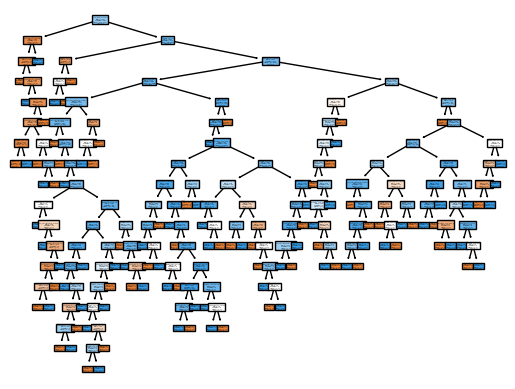

In [198]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train , y_train)
plot_tree(dt ,filled = True , feature_names=X_train.columns.to_list() , class_names = ['Y' , 'N'])
plt.show()

In [199]:
estimator = DecisionTreeClassifier()
param_grid = {'criterion' : ['gini' , 'entropy'] , 'max_depth'  : list(range(1,15))}
grid = GridSearchCV(estimator , param_grid  , cv =5 , scoring = 'accuracy')
grid.fit(X_train , y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [200]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_ , columns = ['imp'] , index = X_train.columns.to_list())
s1

,imp
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0
Credit_History,1.0
Property_Area,0.0
Income,0.0


In [201]:
imp_features = s1[s1['imp']>0].index.to_list()
imp_features

['Credit_History']

In [202]:
X_imp = X[imp_features]
X_train , X_test , y_train , y_test = train_test_split(X_imp , y, train_size = 0.8,random_state = 9)
dt_model = DecisionTreeClassifier(max_depth = 1)
dt_model.fit(X_train , y_train)
print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(dt_model , X_train , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.6496945010183299
cvs: 0.8227994227994226
test_accuracy: 0.6178861788617886


# RF

In [203]:
estimator  = RandomForestClassifier()
param_grid = ({'n_estimators' : list(range(1,50))})
grid= GridSearchCV(estimator , param_grid , cv= 5 , scoring = 'accuracy')
grid.fit(X_train , y_train)
grid.best_estimator_

RandomForestClassifier(n_estimators=1)

In [207]:
s1= pd.DataFrame(grid.best_estimator_.feature_importances_ , columns = ['imp'] , index = X_train.columns.to_list())

In [208]:
imp_feature = s1[s1['imp']>0].index.to_list()

In [209]:
X_imp= X[imp_feature]
X_train , X_test , y_train , y_test = train_test_split(X_imp , y, train_size = 0.8,random_state = 9)
rf=RandomForestClassifier(n_estimators = 1)
rf.fit(X_train, y_train)

print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(rf , X_train , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.6496945010183299
cvs: 0.8227994227994226
test_accuracy: 0.6178861788617886


# ADA boost

In [210]:
estimator = AdaBoostClassifier()
param_grid = {'n_estimators' : list(range(1,20))}
grid = GridSearchCV(estimator , param_grid , cv = 5 , scoring = 'accuracy')
grid.fit(X_train , y_train)
grid.best_estimator_

AdaBoostClassifier(n_estimators=1)

In [211]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_ , columns =['imp'], index = X_train.columns.to_list())

In [212]:
imp_features = s1[s1['imp']>0].index.to_list()
imp_features

['Credit_History']

In [213]:
X_imp= X[imp_feature]
X_train , X_test , y_train , y_test = train_test_split(X_imp , y, train_size = 0.8,random_state = 9)
ada=AdaBoostClassifier(n_estimators = 1)
ada.fit(X_train, y_train)

print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(ada , X_train , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.6496945010183299
cvs: 0.8227994227994226
test_accuracy: 0.6178861788617886


# GradientBoosting

In [214]:
estimator = GradientBoostingClassifier()
param_grid = {'n_estimators' : list(range(1,20)), 'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid = GridSearchCV(estimator , param_grid , cv = 5 , scoring = 'accuracy')
grid.fit(X_train , y_train)
grid.best_estimator_

GradientBoostingClassifier(n_estimators=4)

In [215]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_ , columns =['imp'], index = X_train.columns.to_list())

In [216]:
imp_features = s1[s1['imp']>0].index.to_list()
imp_features

['Credit_History']

In [217]:
X_imp= X[imp_feature]
X_train , X_test , y_train , y_test = train_test_split(X_imp , y, train_size = 0.8,random_state = 9)
gb=GradientBoostingClassifier(n_estimators = 4)
gb.fit(X_train, y_train)

print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(gb , X_train , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.6496945010183299
cvs: 0.8227994227994226
test_accuracy: 0.6178861788617886


# XG Boosting

In [218]:
from xgboost import XGBClassifier
estimator = XGBClassifier()
param_grid = {'n_estimators' : [10,20,40,100], 'learning_rate':[0.1,0.05,0.5,1], 'max_depth':[3,4,5]}
grid = GridSearchCV(estimator , param_grid , cv = 5 , scoring = 'accuracy')
grid.fit(X_train , y_train)
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [219]:
s1 = pd.DataFrame(grid.best_estimator_.feature_importances_ , columns =['imp'], index = X_train.columns.to_list())

In [220]:
imp_features = s1[s1['imp']>0].index.to_list()
imp_features

['Credit_History']

In [221]:
X_imp= X[imp_feature]
X_train , X_test , y_train , y_test = train_test_split(X_imp , y, train_size = 0.8,random_state = 9)
xgb=XGBClassifier(n_estimators = 10)
xgb.fit(X_train, y_train)

print('accuracy_score' , accuracy_score(ypred_train , y_train))
print('cvs:'  , cross_val_score(xgb , X_train , y_train , cv = 5).mean())
print('test_accuracy:' , accuracy_score(ypred_test , y_test))

accuracy_score 0.6496945010183299
cvs: 0.8227994227994226
test_accuracy: 0.6178861788617886


In [290]:
# save the best model
from joblib import dump
dump(svm_model , 'loan.joblib')

['loan.joblib']

# predicting on new data

In [291]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [292]:
input_data = {'Loan_ID' :'LP002991' , 'Gender' : 'Male' ,'Married' : 'No' , 'Dependents' : 1 , 'Education' : 'Graduation' , 'ApplicantIncome' : 1000 , 'CoapplicantIncome': 0 , 
             'LoanAmount': 10000 , 'Loan_Amount_Term' : 240 , 'Credit_History' : 'bad' , 'Property_Area' : 'Urban' }

In [293]:
df= pd.DataFrame(input_data , index = [0])
df

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduation,1000,0,10000,240,bad,Urban


In [294]:
# applying data preprocessing 

In [295]:
df.drop(columns = ['Loan_ID'] , inplace = True)
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'] , inplace = True)

df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(0).astype(int)
#df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'].astype('int')

df['Married'] = df['Married'].replace({"Yes":1 , 'No' : 0})
df['Education']  = df['Education'].replace({'Graduate' : 0 , 'Not Graduate' : 1})
#df['Self_Employed']= df['Self_Employed'].replace({'No':0, 'Yes':1})
df['Property_Area'] = df['Property_Area'].replace({'Urban' : 2, 'Rural' : 0, 'Semiurban' : 1})
df['Loan_Status'] = df['Loan_Status'].replace({'Y' : 1 , 'N' : 0})

df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

X_new= df

KeyError: 'Loan_Status'

In [296]:
X_new

NameError: name 'X_new' is not defined

In [229]:
# select imp features for best model

X_new = X_new[['Credit_History']]

df.predict(X_new)

NameError: name 'X_new' is not defined

x = X_new[imp_features]

xgb.predict(x)